# We Rate Dogs! Data Analysis Project

## Gather Data

### The WeRateDogs Twitter Archive

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Gather data from flat file structure
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
# Check if the data gathered correctly.
twitter_archive_df.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [5]:
# Check if rows containing "..." are complete 
twitter_archive_df.text[0],twitter_archive_df.expanded_urls[0]

("This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'https://twitter.com/dog_rates/status/892420643555336193/photo/1')

### The Image Predictions

In [6]:
import requests

In [7]:
# Image predictions file can be found in following url:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

In [8]:
# Download image prediction file from internet:
response = requests.get(url)
filename = url.split('/')[-1]
with open (filename,mode = 'wb') as file:
    file.write(response.content)

In [9]:
image_predictions_df = pd.read_csv(filename, sep ='\t')

In [10]:
# Check if the data gathered correctly.
image_predictions_df.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


### Retweet Count and Favorite Count

In [11]:
# Gather data from Tweepy Application Programming Interface
import tweepy
import json

In [12]:
#consumer_key = 'someconsumerkey'
#consumer_secret = 'someconsumersecret'
#access_token = 'someaccesstoken'
#access_secret = 'someaccesssecret'

#auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

In [13]:
#fails_list = []
#with open('tweet_json.txt', 'w') as file:
#    for tweet_id in twitter_archive_df.tweet_id: 
#        try:
#            tweet = api.get_status(tweet_id,tweet_mode='extended')
#            json.dump(tweet._json, file)
#            file.write('\n')
#        except:
#            fails_list.append(tweet_id)

In [14]:
# count how many lines in this text file:
# https://www.oreilly.com/library/view/python-cookbook/0596001673/ch04s07.html
line_count = len(open('tweet_json.txt').readlines())
line_count

2354

In [15]:
# https://stackoverflow.com/questions/17949508/python-read-all-text-file-lines-in-loop
df_list=[]
with open('tweet_json.txt',encoding ='utf-8')as file:
        # for line in this text file:
        for tweet in file:
            tweet_json=json.loads(tweet)
            tweet_id=tweet_json['id']
            retweet_count=tweet_json['retweet_count']
            favorite_count=tweet_json['favorite_count']
            # append to list of dictionaries
            df_list.append({'tweet_id':tweet_id,
                            'retweet_count':retweet_count,
                            'favorite_count':favorite_count})
retweet_favorite_df=pd.DataFrame(df_list,columns=['tweet_id','retweet_count','favorite_count'])

In [16]:
# Check if the data gathered correctly.
retweet_favorite_df.head(1)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467


## Assess Data

In [17]:
twitter_archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [18]:
image_predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [19]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

- tweet_id, 
- in_reply_to_status_id, 
- in_reply_to_user_id, 
- retweeted_status_id, 
- retweeted_status_user_id 

*must be string since we will not do any operation on it.*

- timestamp

*must be datetime data type.*

- rating_numerator,
- rating_denominator

*must be float data type, because floating point accurate analysis will be done on these columns.*


In [20]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


- tweet_id

*must be string since we will not do any operation on it.*

In [21]:
retweet_favorite_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


- retweet_count,
- favorite_count

*must be float data type, because floating point accurate analysis will be done on these columns.*

In [22]:
all_columns = pd.Series(list(image_predictions_df) + list(twitter_archive_df)+list(retweet_favorite_df))
all_columns[all_columns.duplicated()]

12    tweet_id
29    tweet_id
dtype: object

In [23]:
twitter_archive_df[twitter_archive_df.expanded_urls.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [24]:
twitter_archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [25]:
image_predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [26]:
twitter_archive_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
182,856602993587888130,NaN,NaN,2017-04-24 20:17:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Luna. It's her first ti...,8.447048e+17,4.196984e+09,2017-03-23 00:18:10 +0000,https://twitter.com/dog_rates/status/844704788...,13,10,Luna,None,None,None,None
167,859851578198683649,NaN,NaN,2017-05-03 19:26:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Trooper. He picks pup recyclables that ha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859851578...,13,10,Trooper,None,None,None,None
2257,667728196545200128,NaN,NaN,2015-11-20 15:36:22 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Meet Olive. He comes to spot by tree to remini...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667728196...,11,10,Olive,None,None,None,None
1605,685681090388975616,6.855479e+17,4.196984e+09,2016-01-09 04:34:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Jack deserves another round of applause. If yo...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
124,868639477480148993,NaN,NaN,2017-05-28 01:26:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to Cooper. His expres...,8.685523e+17,4.196984e+09,2017-05-27 19:39:34 +0000,"https://www.gofundme.com/3ti3nps,https://twitt...",12,10,Cooper,None,None,None,None


In [27]:
twitter_archive_df[twitter_archive_df.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [28]:
image_predictions_df[image_predictions_df.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [29]:
twitter_archive_df.name.value_counts()

None        745
a            55
Charlie      12
Oliver       11
Cooper       11
Lucy         11
Lola         10
Penny        10
Tucker       10
Bo            9
Winston       9
Sadie         8
the           8
an            7
Bailey        7
Daisy         7
Buddy         7
Toby          7
Jack          6
Milo          6
Stanley       6
Dave          6
Bella         6
Scout         6
Oscar         6
Jax           6
Koda          6
Rusty         6
Leo           6
Larry         5
           ... 
Lizzie        1
Philippe      1
light         1
Eevee         1
Sandra        1
Brat          1
Tedders       1
Kaia          1
Marq          1
Duddles       1
Severus       1
Laika         1
Liam          1
Traviss       1
Deacon        1
Dido          1
Spark         1
Ivar          1
Tayzie        1
Oreo          1
Rontu         1
Flurpson      1
Kial          1
Maisey        1
Dante         1
Scott         1
Ito           1
Maxwell       1
Rooney        1
Ozzie         1
Name: name, Length: 957,

In [30]:
twitter_archive_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [31]:
twitter_archive_df[twitter_archive_df.rating_denominator == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [32]:
twitter_archive_df.loc[313].text

"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"

**There is a misinterpretation here, actual ratings are 13/10. Also this is a reply, there may be original tweet included here. Should drop replied tweet for accurate analysis** 

In [33]:
twitter_archive_df[twitter_archive_df.rating_denominator == 7]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None


In [34]:
twitter_archive_df.loc[516].text

'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx'

**24/7 is not a rating. WeRateDogs means 24 hour 7 day here.**

In [35]:
twitter_archive_df[twitter_archive_df.rating_denominator == 170]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None


In [36]:
twitter_archive_df.loc[1120].text

'Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv'

**"Doggos" is included in text but not included in "doggo" column.**

**If the link at the text is opened, it can be seen that there are 17 dogs.The ratings are calculated for all of them: 17*10=170**

In [37]:
twitter_archive_df[twitter_archive_df.rating_denominator == 150]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None


In [38]:
twitter_archive_df.loc[902].text

'Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE'

**Again, there are 15 dogs here.**

In [39]:
twitter_archive_df[twitter_archive_df.rating_denominator == 130]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1634,684225744407494656,6.842229e+17,4.196984e+09,2016-01-05 04:11:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Two sneaky puppers were not initially seen, mo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684225744...,143,130,None,None,None,None,None


In [40]:
twitter_archive_df.loc[1634].text

'Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3'

**Here, "puppers" included in the text but not specified in pupper column.**

**Again, there are 13 dogs here.**

In [41]:
twitter_archive_df[twitter_archive_df.rating_denominator == 120]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1779,677716515794329600,NaN,NaN,2015-12-18 05:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",IT'S PUPPERGEDDON. Total of 144/120 ...I think...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677716515...,144,120,None,None,None,None,None


In [42]:
twitter_archive_df.loc[1779].text

"IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq"

**Here, "pupper" included in the text but not specified in pupper column.**

**12 dogs here.**

In [43]:
twitter_archive_df[twitter_archive_df.rating_denominator == 110]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1635,684222868335505415,NaN,NaN,2016-01-05 04:00:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Someone help the girl is being mugged. Several...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684222868...,121,110,None,None,None,None,None


In [44]:
twitter_archive_df.loc[1635].text

'Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55'

**Here, "pupper" included in the text but not specified in pupper column.**

**11 dogs here.**

In [45]:
twitter_archive_df[twitter_archive_df.rating_denominator == 90]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None


In [46]:
twitter_archive_df.loc[1228].text

"Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1"

**Here, "pupper" included in the text but not specified in pupper column.**

**9 dogs here.**

In [47]:
twitter_archive_df[twitter_archive_df.rating_denominator == 15]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,30582082.0,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None


In [48]:
twitter_archive_df.loc[342].text

'@docmisterio account started on 11/15/15'

**15 is not a rating, it is date.**

In [49]:
twitter_archive_df[twitter_archive_df.rating_denominator == 70]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None


In [50]:
twitter_archive_df.loc[433].text

'The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd'

**Here, "floof" included in the text but not specified in floofer column.**

**7 dogs here.**

In [51]:
twitter_archive_df[twitter_archive_df.rating_denominator == 40]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1433,697463031882764288,NaN,NaN,2016-02-10 16:51:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Wednesday here's a bucket of pups. 44/40...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697463031...,44,40,None,None,None,None,None


In [52]:
twitter_archive_df.loc[1433].text

"Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ"

**Here, "pupper" included in the text but not specified in pupper column.**

**4 dogs here.**

In [53]:
twitter_archive_df[twitter_archive_df.rating_denominator == 16]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1663,682808988178739200,6.827884e+17,4.196984e+09,2016-01-01 06:22:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I'm aware that I could've said 20/16, but here...",NaN,NaN,NaN,NaN,20,16,None,None,None,None,None


In [54]:
twitter_archive_df.loc[1663].text

"I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible"

**This is also not a valid rating.**

In [55]:
twitter_archive_df[twitter_archive_df.rating_denominator == 2]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


In [56]:
twitter_archive_df.loc[2335].text

'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv'

**Here correct rating is 9/10**

In [57]:
twitter_archive_df[twitter_archive_df.rating_denominator == 20]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1598,686035780142297088,6.860340e+17,4.196984e+09,2016-01-10 04:04:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Yes I do realize a rating of 4/20 would've bee...,NaN,NaN,NaN,NaN,4,20,None,None,None,None,None


In [58]:
twitter_archive_df.loc[1165].text

'Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a'

**Here correct rating is 13/10**

In [59]:
twitter_archive_df.loc[1598].text

"Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating"

**Here, "pupper" included in the text but not specified in pupper column.**

**This is a reply and will be dropped**

In [60]:
twitter_archive_df[twitter_archive_df.rating_denominator == 80]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None
1843,675853064436391936,NaN,NaN,2015-12-13 01:41:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have an entire platoon of puppers. Tot...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675853064...,88,80,None,None,None,None,None


In [61]:
twitter_archive_df.loc[1254].text

"Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12"

**Here, "pupper" included in the text but not specified in pupper column.**

**8 puppers here**

In [62]:
twitter_archive_df.loc[1843].text

'Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw'

**Here, "pupper" included in the text but not specified in pupper column.**

**8 puppers again**

In [63]:
twitter_archive_df[twitter_archive_df.rating_denominator == 50]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1274,709198395643068416,NaN,NaN,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/709198395...,45,50,None,None,None,None,None
1351,704054845121142784,NaN,NaN,2016-02-28 21:25:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a whole flock of puppers. 60/50 I'll ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704054845...,60,50,a,None,None,None,None


In [64]:
twitter_archive_df.loc[1202].text

'This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq'

**Here correct rating is 11/10**

In [65]:
twitter_archive_df.loc[1274].text

'From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK'

**5 dogs here**

In [66]:
twitter_archive_df.loc[1351].text

"Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa"

**Here, "pupper" included in the text but not specified in pupper column.**

**5 dogs here**

In [67]:
twitter_archive_df[twitter_archive_df.rating_denominator == 11]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1662,682962037429899265,NaN,NaN,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682962037...,7,11,Darrel,None,None,None,None


In [68]:
twitter_archive_df.loc[1068].text

'After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ'

**Here correct rating is 14/10**

In [69]:
twitter_archive_df.loc[784].text

'RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…'

**This should be dropped as it is RT**

In [70]:
twitter_archive_df.loc[1662].text

'This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5'

**Here correct rating is 10/10**

In [71]:
image_predictions_df.p1

0            Welsh_springer_spaniel
1                           redbone
2                   German_shepherd
3               Rhodesian_ridgeback
4                miniature_pinscher
5              Bernese_mountain_dog
6                        box_turtle
7                              chow
8                     shopping_cart
9                  miniature_poodle
10                 golden_retriever
11                    Gordon_setter
12                     Walker_hound
13                              pug
14                       bloodhound
15                            Lhasa
16                   English_setter
17                              hen
18                 desktop_computer
19                Italian_greyhound
20                      Maltese_dog
21                 three-toed_sloth
22                               ox
23                 golden_retriever
24                         malamute
25                       guinea_pig
26      soft-coated_wheaten_terrier
27                        Ch

In [72]:
twitter_archive_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [73]:
twitter_archive_df[twitter_archive_df.rating_numerator==1776]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


In [74]:
twitter_archive_df.loc[979].text

"This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh"

In [75]:
twitter_archive_df[twitter_archive_df.rating_numerator==420]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,194351775.0,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
2074,670842764863651840,NaN,NaN,2015-11-29 05:52:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670842764...,420,10,None,None,None,None,None


In [76]:
twitter_archive_df.loc[2074].text

'After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY'

In [77]:
twitter_archive_df[twitter_archive_df.rating_numerator==75]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None


In [78]:
twitter_archive_df.loc[695].text

"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS"

**Here correct rating is 9.75/10**

In [79]:
twitter_archive_df[twitter_archive_df.rating_numerator==26]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726...,26,10,None,None,None,None,None


In [80]:
twitter_archive_df.loc[1712].text

'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD'

**Here correct rating is 11.26/10**

In [81]:
twitter_archive_df[twitter_archive_df.rating_numerator==27]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None


In [82]:
twitter_archive_df.loc[763].text

"This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq"

**Here correct rating is 11.27/10**

#### Quality
##### `twitter_archive_df` table
- Some tweets does not include dog ratings.These tweets(rows) will be deleted.
- In some tweets several dogs are rated as #of dogs x 10. These ratings will be divided by #of dogs for accurate analysis.
- Some ratings are misinterpreted as dates, percentages etc. and there are also correct ratings included in these tweets. These will be changed with correct ratings.
- After cleaning ratings, all `denominator ratings` will be equal to 10 and it is meaningless to have in our analysis. Therefore `denominator ratings` column will be dropped.
- Both original tweets and response to these tweets (retweets,replies) used in analysis means duplicate values are used in analysis. Therefore these tweets will be removed.  
- There are lots of missing records in columns: `in_reply_to_status_id`, `in_reply_to_user_id`,`retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`. Most of these missing records are not available or not exist. These columns are not useful in the analysis, and will be dropped. 
- Dog **"stage"** is missed for some data types.
- Name of the dog can't be **'a'**,**'an'**,**'the'**,**'very'**,**'None'**,**'space'** etc. These values will be replaced with NaN.
- Erroneous datatypes (`tweet_id`, `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `timestamp`, `rating_numerator`)

##### `image_predictions_df` table
- Name of breeds of dogs classified (p1, p2 and p3) are sometimes uppercase, sometimes lowercase.
- Erroneous datatype tweet_id.

##### `retweet_favorite_df` table
- Erroneous datatype retweet_count,favorite_count

#### Tidiness
- `twitter_archive_df` and `retweet_favorite_df` should be part of the `image_predictions_df` table. There are 2075 records for image_predictions_df.
- tweet_id in `twitter_archive_df` table duplicated in `retweet_favorite_df` and `image_predictions_df` tables
- columns `doggo`,`floofer`,`pupper`,`puppo` will be merged as `stage` column

## Clean

In [83]:
twitter_archive_clean = twitter_archive_df.copy()
image_predictions_clean = image_predictions_df.copy()
retweet_favorite_clean = retweet_favorite_df.copy()

### Missing Data

**Both original tweets and response to these tweets (retweets,replies) used in analysis means duplicate values are used in analysis. Therefore these tweets will be removed.**

##### Define

Remove tweets which have non null values in columns:`in_reply_to_status_id`, `in_reply_to_user_id`,`retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`.

##### Code

In [84]:
twitter_archive_clean=twitter_archive_clean[twitter_archive_clean.in_reply_to_status_id.isnull()]
twitter_archive_clean=twitter_archive_clean[twitter_archive_clean.in_reply_to_user_id.isnull()]
twitter_archive_clean=twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]
twitter_archive_clean=twitter_archive_clean[twitter_archive_clean.retweeted_status_user_id.isnull()]
twitter_archive_clean=twitter_archive_clean[twitter_archive_clean.retweeted_status_timestamp.isnull()]

##### Test

In [85]:
twitter_archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


**There are lots of missing records in columns: `in_reply_to_status_id`, `in_reply_to_user_id`,`retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`. Most of these missing records are not available or not exist. These columns are not useful in the analysis, and will be dropped.**

##### Define

Drop columns using `.drop` method

##### Code

In [86]:
twitter_archive_clean = twitter_archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis=1)

##### Test

In [87]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


**Dog "stage" is missed for some data types**

##### Define
Extract the dog stage from the text column using regular expressions and pandas' str.extract method. Drop doggo,floof,pupper and puppo column when done.

##### Code

In [88]:
twitter_archive_clean['doggos']=twitter_archive_clean.text.str.extract(r'([dD]oggo)', expand=False)
twitter_archive_clean['floofers']=twitter_archive_clean.text.str.extract(r'([fF]loof)', expand=False)
twitter_archive_clean['puppers']=twitter_archive_clean.text.str.extract(r'([pP]upper)', expand=False)
twitter_archive_clean['puppos']=twitter_archive_clean.text.str.extract(r'([pP]uppo)', expand=False)

In [89]:
twitter_archive_clean = twitter_archive_clean.drop(['doggo','floofer','pupper','puppo'], axis=1)

##### Test

In [90]:
twitter_archive_clean.sample(25)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggos,floofers,puppers,puppos
1545,689289219123089408,2016-01-19 03:32:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Someone sent me this without any context and e...,https://twitter.com/dog_rates/status/689289219...,13,10,None,NaN,NaN,NaN,NaN
1511,691416866452082688,2016-01-25 00:26:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I present to you... Dog Jesus. 13/10 (he could...,https://twitter.com/dog_rates/status/691416866...,13,10,None,NaN,NaN,NaN,NaN
1036,744971049620602880,2016-06-20 19:11:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Indie and Jupiter. They're having...,https://twitter.com/dog_rates/status/744971049...,12,10,Indie,NaN,NaN,NaN,NaN
2122,670403879788544000,2015-11-28 00:48:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Nigel. He accidentally popped his ball...,https://twitter.com/dog_rates/status/670403879...,10,10,Nigel,NaN,NaN,NaN,NaN
689,787717603741622272,2016-10-16 18:11:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tonks. She is a service puppo. Can hea...,https://twitter.com/dog_rates/status/787717603...,13,10,Tonks,NaN,NaN,NaN,puppo
1191,717841801130979328,2016-04-06 22:29:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Barclay. His father was a banana. 11/1...,https://twitter.com/dog_rates/status/717841801...,11,10,Barclay,NaN,NaN,NaN,NaN
1534,689993469801164801,2016-01-21 02:10:37 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here we are witnessing a rare High Stepping Al...,https://vine.co/v/ienexVMZgi5,12,10,None,NaN,Floof,NaN,NaN
938,753294487569522689,2016-07-13 18:26:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ace. He's a window washer. One of the ...,https://twitter.com/dog_rates/status/753294487...,11,10,Ace,NaN,NaN,NaN,NaN
1781,677698403548192770,2015-12-18 03:54:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sadie. She got her holidays confused. ...,https://twitter.com/dog_rates/status/677698403...,9,10,Sadie,NaN,NaN,NaN,NaN
1348,704347321748819968,2016-02-29 16:47:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ralphson. He's very confused. Wonderin...,https://twitter.com/dog_rates/status/704347321...,10,10,Ralphson,NaN,NaN,pupper,NaN


### Tidiness

**`twitter_archive_df` and `retweet_favorite_df` should be part of the `image_predictions_df` table. There are 2075 records for image_predictions_df.**

**tweet_id in `twitter_archive_df` table duplicated in `retweet_favorite_df` and `image_predictions_df` tables**

##### Define
Merge retweet_count and favorite_count columns to the twitter_archive_df table, joining on tweet_id.

##### Code

In [91]:
twitter_archive_clean = pd.merge(twitter_archive_clean, retweet_favorite_clean,
                            on=['tweet_id'], how='left')

In [92]:
image_predictions_clean = pd.merge(image_predictions_clean, twitter_archive_clean,
                            on=['tweet_id'], how='inner')

In [93]:
all_clean = image_predictions_clean.copy()

##### Test

In [94]:
all_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,expanded_urls,rating_numerator,rating_denominator,name,doggos,floofers,puppers,puppos,retweet_count,favorite_count
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,...,https://twitter.com/dog_rates/status/666020888...,8,10,None,NaN,NaN,NaN,NaN,532,2535
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,...,https://twitter.com/dog_rates/status/666029285...,7,10,a,NaN,NaN,NaN,NaN,48,132
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,...,https://twitter.com/dog_rates/status/666033412...,9,10,a,NaN,NaN,NaN,NaN,47,128
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,...,https://twitter.com/dog_rates/status/666044226...,6,10,a,NaN,NaN,NaN,NaN,147,311
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,...,https://twitter.com/dog_rates/status/666049248...,5,10,None,NaN,NaN,NaN,NaN,41,111


**columns `doggos`,`floofers`,`puppers`,`puppos` will be merged as `dog_stage` column**

##### Define
Combine multiple columns in Pandas excluding NaNs, using following:

https://stackoverflow.com/questions/45787782/combine-multiple-columns-in-pandas-excluding-nans

##### Code

In [95]:
cols = ['doggos', 'floofers', 'puppers', 'puppos']
all_clean["dog_stage"] = all_clean[cols].apply(lambda x: ','.join(x.dropna()), axis=1)
all_clean = all_clean.drop(['doggos','floofers','puppers','puppos'], axis=1)
# Reconvert NaNs entries that were converted to '' by code above
all_clean.dog_stage = all_clean.dog_stage.replace('', np.nan)

In [96]:
all_clean['dog_stage'] = all_clean['dog_stage'].str.lower()

##### Test

In [97]:
all_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_stage
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,...,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,None,532,2535,NaN
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,...,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,48,132,NaN
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,...,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,47,128,NaN
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,...,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,147,311,NaN
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,...,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,41,111,NaN


### Quality

**Some tweets does not include dog ratings.These tweets(rows) will be deleted.**

##### Define
remove tweets without dog ratings using `.drop` method

##### Code

In [98]:
all_clean = all_clean.drop(all_clean[all_clean.rating_denominator == 7].index)

##### Test

In [99]:
all_clean[all_clean.rating_denominator == 7]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_stage


**Erroneous datatypes: rating_numerator**

##### Define
Convert the rating_numerator column's data type from a int to a float using astype,

##### Code

In [100]:
all_clean.rating_numerator = all_clean.rating_numerator.astype(float)

##### Test

In [101]:
all_clean.rating_numerator.head(5)

0    8.0
1    7.0
2    9.0
3    6.0
4    5.0
Name: rating_numerator, dtype: float64

**Some ratings are misinterpreted as dates, percentages etc. and there are also correct ratings included in these tweets. These will be changed with correct ratings.**

##### Define
write correct ratings using `.at`

https://stackoverflow.com/questions/13842088/set-value-for-particular-cell-in-pandas-dataframe-using-index

##### Code

In [102]:
all_clean[all_clean.rating_denominator == 2]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_stage
20,666287406224695296,https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg,1,Maltese_dog,0.857531,True,toy_poodle,0.063064,True,miniature_poodle,...,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,1.0,2,an,71,152,NaN


In [103]:
all_clean.at[20,'rating_denominator'] = 10
all_clean.at[20,'rating_numerator'] = 9

In [104]:
all_clean[all_clean.rating_denominator == 20]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_stage
1086,722974582966214656,https://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jpg,1,Great_Dane,0.246762,True,Greater_Swiss_Mountain_dog,0.126131,True,Weimaraner,...,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,4.0,20,None,1764,4493,NaN


In [105]:
all_clean.at[1086,'rating_denominator'] = 10
all_clean.at[1086,'rating_numerator'] = 13

In [106]:
all_clean[all_clean.rating_denominator == 50]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_stage
925,704054845121142784,https://pbs.twimg.com/media/CcVOJEcXEAM0FHL.jpg,1,Great_Pyrenees,0.667939,True,kuvasz,0.228764,True,golden_retriever,...,2016-02-28 21:25:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a whole flock of puppers. 60/50 I'll ...,https://twitter.com/dog_rates/status/704054845...,60.0,50,a,1028,3201,pupper
989,709198395643068416,https://pbs.twimg.com/media/CdeUKpcWoAAJAWJ.jpg,1,borzoi,0.490783,True,wire-haired_fox_terrier,0.083513,True,English_setter,...,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",https://twitter.com/dog_rates/status/709198395...,45.0,50,None,721,2634,NaN
1052,716439118184652801,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,1,Siberian_husky,0.396495,True,malamute,0.317053,True,Eskimo_dog,...,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50.0,50,Bluebert,247,2574,NaN


In [107]:
all_clean.at[1052,'rating_denominator'] = 10
all_clean.at[1052,'rating_numerator'] = 11

In [108]:
all_clean[all_clean.rating_denominator == 11]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_stage
657,682962037429899265,https://pbs.twimg.com/media/CXpeVzQW8AApKYb.jpg,1,dingo,0.278600,False,Chihuahua,0.155207,True,loupe,...,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,https://twitter.com/dog_rates/status/682962037...,7.0,11,Darrel,15043,26239,NaN
1176,740373189193256964,https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg,3,golden_retriever,0.807644,True,kuvasz,0.101286,True,Labrador_retriever,...,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,9.0,11,None,9220,20648,NaN


In [109]:
all_clean.at[657,'rating_denominator'] = 10
all_clean.at[657,'rating_numerator'] = 10
all_clean.at[1176,'rating_denominator'] = 10
all_clean.at[1176,'rating_numerator'] = 14

In [110]:
all_clean[all_clean.rating_numerator==75]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_stage
1471,786709082849828864,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,1,Pomeranian,0.467321,True,Persian_cat,0.122978,False,chow,...,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75.0,10,Logan,7069,20296,NaN


In [111]:
all_clean.at[1471,'rating_numerator'] = 9.75

In [112]:
all_clean[all_clean.rating_numerator==27]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_stage
1421,778027034220126208,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,1,clumber,0.946718,True,cocker_spaniel,0.01595,True,Lhasa,...,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27.0,10,Sophie,1885,7320,pupper


In [113]:
all_clean.at[1421,'rating_numerator'] = 11.27

In [114]:
all_clean[all_clean.rating_numerator==26]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_stage
611,680494726643068929,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,1,kuvasz,0.438627,True,Samoyed,0.111622,True,Great_Pyrenees,...,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,26.0,10,None,542,1879,pupper


In [115]:
all_clean.at[611,'rating_numerator'] = 11.26

##### Test

In [116]:
all_clean.rating_denominator.value_counts()

10     1959
80        2
50        2
170       1
150       1
120       1
110       1
90        1
70        1
40        1
Name: rating_denominator, dtype: int64

**In some tweets several dogs are rated as #of dogs x 10. These ratings will be divided by #of dogs for accurate analysis.**

##### Define
divide rating_numerator and rating_denominator of those tweets with rating_denominator/10

##### Code

In [117]:
index_multiple_puppers=all_clean[all_clean['rating_denominator'] != 10].index

In [118]:
for index in index_multiple_puppers:
    all_clean.at[index,'rating_numerator']=all_clean.loc[index].rating_numerator/(all_clean.loc[index].rating_denominator/10)

In [119]:
all_clean.rating_denominator = all_clean.rating_denominator.replace([80,50,170,150,120,110,90,70,40], 10)

##### Test

In [120]:
all_clean[all_clean.rating_denominator!=10]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_stage


In [121]:
all_clean.rating_numerator.value_counts()

12.00      450
10.00      419
11.00      398
13.00      254
9.00       151
8.00        95
7.00        51
14.00       34
5.00        33
6.00        32
3.00        19
4.00        15
2.00         9
1.00         4
420.00       1
9.75         1
0.00         1
11.26        1
11.27        1
1776.00      1
Name: rating_numerator, dtype: int64

**After cleaning ratings, all denominator ratings will be equal to 10 and it is meaningless to have in our analysis. Therefore denominator ratings column will be dropped.**

##### Define
remove rating_denominator column using `.drop` method

##### Code

In [122]:
all_clean=all_clean.drop('rating_denominator', axis=1)

##### Test

In [123]:
all_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,p3_dog,timestamp,source,text,expanded_urls,rating_numerator,name,retweet_count,favorite_count,dog_stage
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,...,True,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8.0,None,532,2535,NaN
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,...,True,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7.0,a,48,132,NaN
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,...,True,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9.0,a,47,128,NaN
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,...,True,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6.0,a,147,311,NaN
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,...,True,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5.0,None,41,111,NaN


**Name of the dog can't be 'a','an','the','very','None','space' etc. These values will be replaced with NaN.**

##### Define
Replace these names with NaN using .replace

##### Code

In [124]:
all_clean.name = all_clean.name.replace(['a','an','the','very','such','quite','None','space','10'], np.nan)

##### Test

In [125]:
all_clean.name.value_counts()

Charlie      11
Cooper       10
Oliver       10
Lucy         10
Penny         9
Tucker        9
Winston       8
Sadie         8
Toby          7
Lola          7
Daisy         7
Jax           6
Bo            6
Bella         6
Stanley       6
Koda          6
Bailey        5
Chester       5
Rusty         5
Dave          5
Leo           5
Louis         5
Milo          5
Buddy         5
Scout         5
Oscar         5
Clarence      4
Dexter        4
Maggie        4
Gus           4
             ..
Aiden         1
Thor          1
Bonaparte     1
Stewie        1
Gert          1
Trevith       1
Iroh          1
Gustaf        1
Reptar        1
Tino          1
Lulu          1
Rinna         1
Kevon         1
Carper        1
Socks         1
Mauve         1
Paull         1
Clarq         1
Nida          1
Pete          1
Hurley        1
O             1
Jarvis        1
Carbon        1
Darby         1
Mary          1
Siba          1
Billl         1
Jamesy        1
Ozzie         1
Name: name, Length: 927,

**Erroneous datatypes (tweet_id, timestamp)**

##### Define
Convert the tweet_id column's data type from a int to a string using. `.astype`

Convert timestamp to datetime data type using. `.to_datetime`

##### Code

In [126]:
all_clean.tweet_id = all_clean.tweet_id.astype(str)

In [127]:
all_clean.timestamp = pd.to_datetime(all_clean.timestamp)

##### Test

In [128]:
all_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1970 entries, 0 to 1970
Data columns (total 21 columns):
tweet_id            1970 non-null object
jpg_url             1970 non-null object
img_num             1970 non-null int64
p1                  1970 non-null object
p1_conf             1970 non-null float64
p1_dog              1970 non-null bool
p2                  1970 non-null object
p2_conf             1970 non-null float64
p2_dog              1970 non-null bool
p3                  1970 non-null object
p3_conf             1970 non-null float64
p3_dog              1970 non-null bool
timestamp           1970 non-null datetime64[ns]
source              1970 non-null object
text                1970 non-null object
expanded_urls       1970 non-null object
rating_numerator    1970 non-null float64
name                1369 non-null object
retweet_count       1970 non-null int64
favorite_count      1970 non-null int64
dog_stage           363 non-null object
dtypes: bool(3), datetime64[ns

**Erroneous datatype retweet_count,favorite_count**

##### Define
Convert the retweet_count and favorite_count columns' data type from a int to a float using. `.astype`

##### Code

In [129]:
all_clean.retweet_count = all_clean.retweet_count.astype(float)
all_clean.favorite_count = all_clean.favorite_count.astype(float)

##### Test

In [130]:
all_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1970 entries, 0 to 1970
Data columns (total 21 columns):
tweet_id            1970 non-null object
jpg_url             1970 non-null object
img_num             1970 non-null int64
p1                  1970 non-null object
p1_conf             1970 non-null float64
p1_dog              1970 non-null bool
p2                  1970 non-null object
p2_conf             1970 non-null float64
p2_dog              1970 non-null bool
p3                  1970 non-null object
p3_conf             1970 non-null float64
p3_dog              1970 non-null bool
timestamp           1970 non-null datetime64[ns]
source              1970 non-null object
text                1970 non-null object
expanded_urls       1970 non-null object
rating_numerator    1970 non-null float64
name                1369 non-null object
retweet_count       1970 non-null float64
favorite_count      1970 non-null float64
dog_stage           363 non-null object
dtypes: bool(3), datetime6

**Name of breeds of dogs classified (p1, p2 and p3) are sometimes uppercase, sometimes lowercase**

##### Define
Name of breeds of dogs will be cast to lowercase.

##### Code

In [131]:
all_clean['p1'] = all_clean['p1'].str.lower()
all_clean['p2'] = all_clean['p2'].str.lower()
all_clean['p3'] = all_clean['p3'].str.lower()

##### Test

In [132]:
all_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,p3_dog,timestamp,source,text,expanded_urls,rating_numerator,name,retweet_count,favorite_count,dog_stage
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,...,True,2015-11-15 22:32:08,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8.0,NaN,532.0,2535.0,NaN
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,...,True,2015-11-15 23:05:30,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7.0,NaN,48.0,132.0,NaN
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,...,True,2015-11-15 23:21:54,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9.0,NaN,47.0,128.0,NaN
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,...,True,2015-11-16 00:04:52,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6.0,NaN,147.0,311.0,NaN
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,...,True,2015-11-16 00:24:50,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5.0,NaN,41.0,111.0,NaN
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,bernese_mountain_dog,0.651137,True,english_springer,0.263788,True,greater_swiss_mountain_dog,...,True,2015-11-16 00:30:50,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,https://twitter.com/dog_rates/status/666050758...,10.0,NaN,60.0,136.0,NaN
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,...,False,2015-11-16 00:35:11,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,https://twitter.com/dog_rates/status/666051853...,2.0,NaN,879.0,1253.0,NaN
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,tibetan_mastiff,0.058279,True,fur_coat,...,False,2015-11-16 00:49:46,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,https://twitter.com/dog_rates/status/666055525...,10.0,NaN,261.0,448.0,NaN
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,...,True,2015-11-16 00:55:59,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,https://twitter.com/dog_rates/status/666057090...,9.0,NaN,146.0,304.0,NaN
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,...,True,2015-11-16 01:01:59,"<a href=""http://twitter.com/download/iphone"" r...",Here is the Rand Paul of retrievers folks! He'...,https://twitter.com/dog_rates/status/666058600...,8.0,NaN,61.0,115.0,NaN


In [133]:
all_clean.p1.value_counts()

golden_retriever             136
labrador_retriever            94
pembroke                      88
chihuahua                     78
pug                           54
chow                          41
samoyed                       40
pomeranian                    38
toy_poodle                    37
malamute                      29
cocker_spaniel                27
french_bulldog                26
chesapeake_bay_retriever      23
seat_belt                     21
miniature_pinscher            21
german_shepherd               20
siberian_husky                20
staffordshire_bullterrier     19
maltese_dog                   18
shetland_sheepdog             18
eskimo_dog                    18
shih-tzu                      17
beagle                        17
cardigan                      17
teddy                         17
rottweiler                    16
italian_greyhound             16
kuvasz                        15
lakeland_terrier              15
great_pyrenees                14
          

In [134]:
all_clean.p2.value_counts()

labrador_retriever                95
golden_retriever                  82
cardigan                          73
chihuahua                         43
chesapeake_bay_retriever          40
french_bulldog                    39
pomeranian                        38
toy_poodle                        36
siberian_husky                    33
cocker_spaniel                    32
miniature_poodle                  32
eskimo_dog                        27
beagle                            27
collie                            26
kuvasz                            24
pembroke                          24
italian_greyhound                 22
pekinese                          21
chow                              20
american_staffordshire_terrier    20
miniature_pinscher                20
malinois                          20
boston_bull                       19
toy_terrier                       19
norwegian_elkhound                19
samoyed                           17
staffordshire_bullterrier         17
p

In [135]:
all_clean.p3.value_counts()

labrador_retriever                75
chihuahua                         57
golden_retriever                  45
eskimo_dog                        36
kelpie                            33
kuvasz                            31
staffordshire_bullterrier         30
chow                              30
beagle                            29
cocker_spaniel                    29
toy_poodle                        29
pekinese                          28
pomeranian                        27
pembroke                          26
great_pyrenees                    25
french_bulldog                    25
malamute                          25
chesapeake_bay_retriever          24
cardigan                          23
american_staffordshire_terrier    23
pug                               21
basenji                           20
bull_mastiff                      19
siberian_husky                    19
toy_terrier                       18
boston_bull                       17
shetland_sheepdog                 16
l

### Storing Data

In [136]:
all_clean.to_csv('twitter_archive_master.csv', index=False)

### Analyze

- How are the distribution of ratings? Which ratings are highest and which ratings are lowest?
- How common these stages are used
- Which dog stage is the most common?
- Which dog stage has the highest average of ratings? 
- Which dog breed is the most common?
- What is the relationship between ratings and favorite count? 
- What is the relationship between ratings and retweet count? 

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns

**How are the distribution of ratings? Which ratings are highest and which ratings are lowest?**

In [138]:
all_clean['rating_numerator'].value_counts()

12.00      450
10.00      419
11.00      398
13.00      254
9.00       151
8.00        95
7.00        51
14.00       34
5.00        33
6.00        32
3.00        19
4.00        15
2.00         9
1.00         4
420.00       1
9.75         1
0.00         1
11.26        1
11.27        1
1776.00      1
Name: rating_numerator, dtype: int64

There are two ratings that are far greater than others: 1776 and 420. These ratings are checked in assesment and they are correct.

In [139]:
all_clean.loc[1248].text

"This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh"

In [140]:
all_clean.loc[274].text

'After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY'

In [141]:
all_clean = all_clean.drop(all_clean[all_clean.rating_numerator == 1776].index)
all_clean = all_clean.drop(all_clean[all_clean.rating_numerator == 420].index)

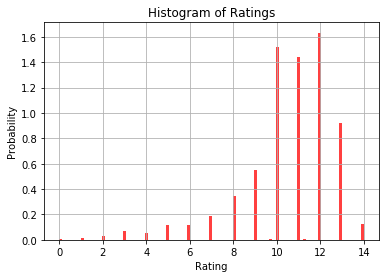

In [142]:
plt.hist(all_clean['rating_numerator'],100, density=True, facecolor='r', alpha=0.75)
plt.xlabel('Rating')
plt.ylabel('Probability')
plt.title('Histogram of Ratings')
plt.grid(True)
plt.show()

`The most common 5 ratings are 9,10,11,12,13`

**Which dog stage is the most common?**

In [143]:
all_clean['dog_stage'].value_counts()

pupper          222
doggo            67
floof            34
puppo            27
doggo,pupper      8
doggo,floof       2
doggo,puppo       2
floof,pupper      1
Name: dog_stage, dtype: int64

`The most commond dog stage is 'pupper'`

**How common these stages are used**

In [145]:
all_clean[all_clean['dog_stage']=="pupper"].shape[0]/all_clean.shape[0]

0.11280487804878049

In [146]:
all_clean[all_clean['dog_stage']=="doggo"].shape[0]/all_clean.shape[0]

0.03404471544715447

In [147]:
all_clean[all_clean['dog_stage']=="floof"].shape[0]/all_clean.shape[0]

0.017276422764227643

In [148]:
all_clean[all_clean['dog_stage']=="puppo"].shape[0]/all_clean.shape[0]

0.013719512195121951

**Which dog stage has the highest average of ratings?**

In [143]:
all_clean[all_clean['dog_stage']=="pupper"].rating_numerator.mean()

10.587972972972972

In [144]:
all_clean[all_clean['dog_stage']=="doggo"].rating_numerator.mean()

11.865671641791044

In [145]:
all_clean[all_clean['dog_stage']=="floof"].rating_numerator.mean()

11.705882352941176

In [146]:
all_clean[all_clean['dog_stage']=="puppo"].rating_numerator.mean()

12.111111111111111

`Dog stage "puppo" has highest average ratings. However, the number of stages are different therefore it may not be correct to compare average ratings.`

**Which dog breed is the most common?**

In [147]:
all_clean.p1.value_counts()

golden_retriever               136
labrador_retriever              94
pembroke                        88
chihuahua                       78
pug                             54
chow                            41
samoyed                         40
pomeranian                      38
toy_poodle                      37
malamute                        29
cocker_spaniel                  27
french_bulldog                  26
chesapeake_bay_retriever        23
miniature_pinscher              21
seat_belt                       21
german_shepherd                 20
siberian_husky                  20
staffordshire_bullterrier       19
maltese_dog                     18
shetland_sheepdog               18
eskimo_dog                      18
cardigan                        17
beagle                          17
teddy                           17
shih-tzu                        17
rottweiler                      16
italian_greyhound               16
kuvasz                          15
lakeland_terrier    

`The most common dog breed is golden_retriever`

**What is the relationship between ratings and favorite count?**

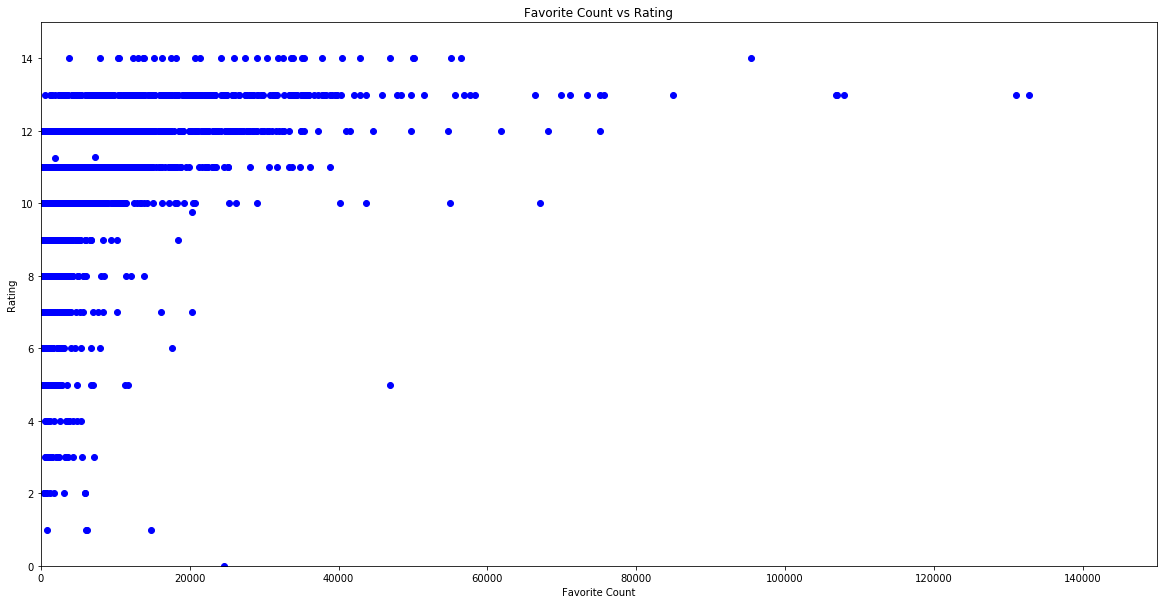

In [152]:
plt.figure(figsize=(20,10))
plt.plot(all_clean['favorite_count'],all_clean['rating_numerator'],'bo')
plt.xlabel('Favorite Count')
plt.ylabel('Rating')
plt.axis([0,150000, 0, 15])
plt.title('Favorite Count vs Rating')
plt.show()

`Looking at scatter plot, there is a positive correlation between favorite count and ratings.`

**What is the relationship between ratings and retweet count?**

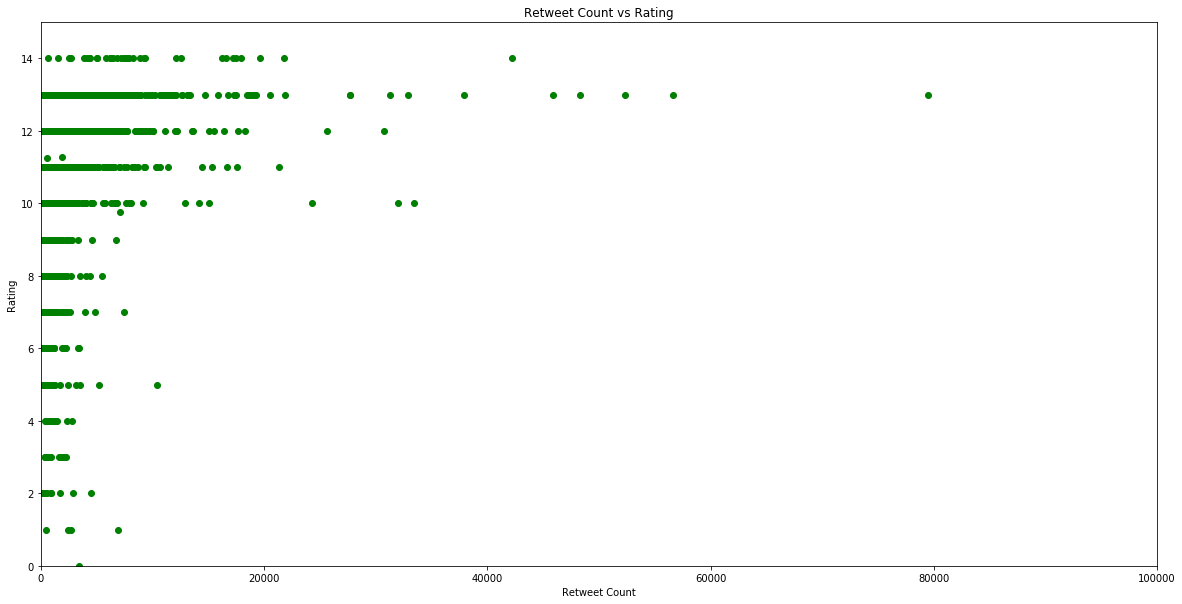

In [153]:
plt.figure(figsize=(20,10))
plt.plot(all_clean['retweet_count'],all_clean['rating_numerator'],'go')
plt.xlabel('Retweet Count')
plt.ylabel('Rating')
plt.axis([0,100000, 0, 15])
plt.title('Retweet Count vs Rating')
plt.show()

`Looking at scatter plot, there is a positive correlation between retweet count and ratings.`

In [150]:
all_clean.corr()

,img_num,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog,rating_numerator,retweet_count,favorite_count
img_num,1.000000,0.202823,0.031873,-0.157315,0.056546,-0.137905,0.058718,0.193882,0.108353,0.138239
p1_conf,0.202823,1.000000,0.126045,-0.511338,0.142221,-0.708458,0.117957,0.099993,0.054166,0.078405
p1_dog,0.031873,0.126045,1.000000,0.109743,0.638385,0.048764,0.560008,0.288662,0.007056,0.052892
p2_conf,-0.157315,-0.511338,0.109743,1.000000,0.096008,0.480548,0.063918,0.007124,-0.018632,-0.021685
p2_dog,0.056546,0.142221,0.638385,0.096008,1.000000,0.031753,0.557530,0.248007,0.015614,0.059706
p3_conf,-0.137905,-0.708458,0.048764,0.480548,0.031753,1.000000,0.034274,-0.026423,-0.043524,-0.052663
p3_dog,0.058718,0.117957,0.560008,0.063918,0.557530,0.034274,1.000000,0.230151,0.009687,0.040373
rating_numerator,0.193882,0.099993,0.288662,0.007124,0.248007,-0.026423,0.230151,1.000000,0.307807,0.410508
retweet_count,0.108353,0.054166,0.007056,-0.018632,0.015614,-0.043524,0.009687,0.307807,1.000000,0.913068
favorite_count,0.138239,0.078405,0.052892,-0.021685,0.059706,-0.052663,0.040373,0.410508,0.913068,1.000000


In the link below, the strength of relationship is categorized according to correlation coefficient.

https://explorable.com/statistical-correlation

If correlation coefficient is between 0.3 to 0.5 -> there is positive moderate relationship between parameters.

`The correlation coefficient between retweet count and ratings is 0.307807 -> there is positive moderate relationship between retweet count and ratings.` 

`The correlation coefficient between favorite count and ratings is 0.410508 -> there is positive moderate relationship between favorite count and ratings` 